## MCEq-1D

In [13]:
# https://mceq.readthedocs.io/en/latest/tutorial.html#tutorial

In [2]:
from MCEq.core import config, MCEqRun
import crflux.models as crf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import mplcyberpunk as mcp
#plt.style.use("cyberpunk")
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['axes.labelcolor'] = 'black'
#plt.rcParams['xtick.color'] = 'black'
#plt.rcParams['ytick.color'] = 'black'

#colors = [
    #'#08F7FE',  # teal/cyan
    #'#FE53BB',  # pink
    #'#F5D300',  # yellow
    #'#00ff41',  # matrix green
#]

In [4]:

def flux(theta, int_model = 'SIBYLL23C', numu_only = False):
    
    
    # Initalize MCEq by creating the user interface object MCEqRun
    mceq = MCEqRun(

        # Hadronic interaction model
        interaction_model= int_model,    # The default is high-energy

        # cosmic ray flux at the top of the atmosphere (primary flux)
        primary_model = (crf.HillasGaisser2012, 'H3a'),

        # zenith angle
        theta_deg = theta
    )
    
    mceq.set_theta_deg(theta*180/np.pi) # in degrees
    mceq.set_interaction_model(int_model)
    #mceq.set_primary_model(crf.HillasGaisser2012, 'H3a')
    
    # Solve the equation system
    mceq.solve()

    # Obtain the result
    # Multiply fluxes be E**mag to resolve the features of the steep spectrum
    mag = 0
    x = mceq.e_grid
    
    if numu_only == False:
        muon_flux = (mceq.get_solution('mu+', mag) +
                     mceq.get_solution('mu-', mag))
        numu_flux = (mceq.get_solution('numu', mag) +
                     mceq.get_solution('antinumu', mag))
        nue_flux = (mceq.get_solution('nue', mag) +
                    mceq.get_solution('antinue', mag))
        return muon_flux, numu_flux, nue_flux, x

    else:
        numu_flux = (mceq.get_solution('numu', mag) +
                     mceq.get_solution('antinumu', mag))
        return numu_flux, x

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)


KeyboardInterrupt: 

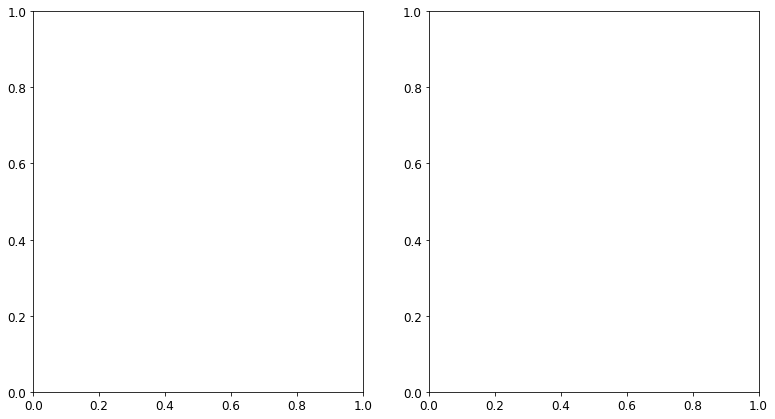

In [5]:
# Plots for 2 different interaction models
interaction_model = ['SIBYLL23C', 'EPOS-LHC']
r_theta = r'$\theta$'
r_numu = r'$\nu_{\mu}$'

fig, axs = plt.subplots(1,2, figsize=(13, 7), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(len(interaction_model)):
    muon_flux_0, numu_flux_0, nue_flux_0, x = flux(0, interaction_model[i])
    
    axs[i].loglog(x, muon_flux_0, label='muons')
    axs[i].loglog(x, numu_flux_0, label='muon neutrinos')
    axs[i].loglog(x, nue_flux_0, label='electron neutrinos')

    axs[i].set_xlim(1., 1e9)
    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    axs[i].set_ylim(1e-6, 1.)
    #(E/\text{GeV})^3\,\Phi$ (GeV cm$^{-2}$\,$s$^{-1}\,$sr$^{-1}$) (GeV)
    axs[i].set_ylabel(r' $\Phi$ ($cm^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].set_title(interaction_model[i])
    axs[i].legend(fontsize=12)
    

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL

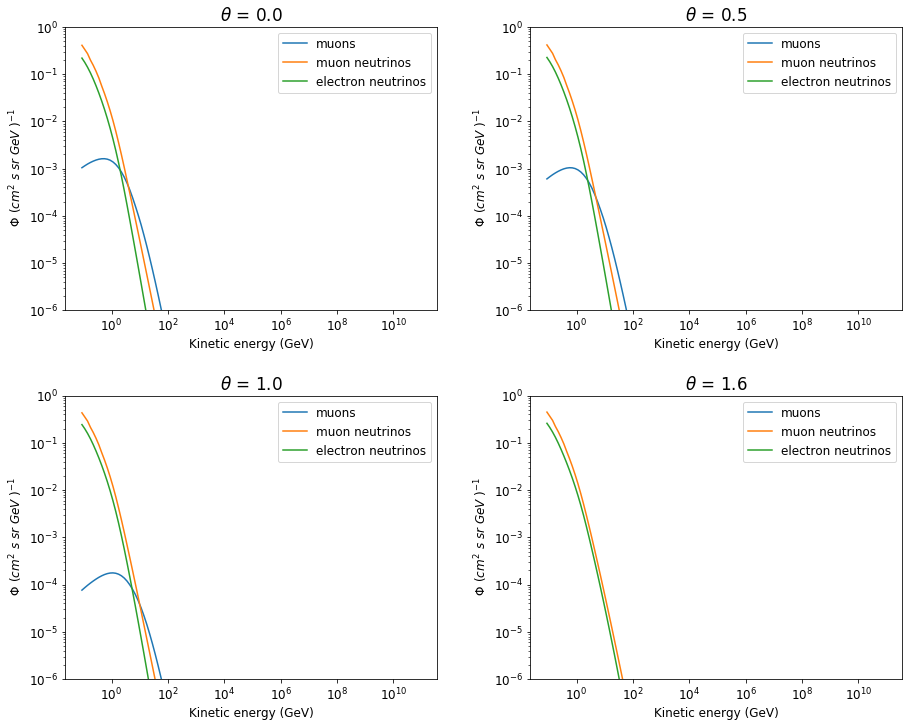

In [299]:
# Plots for 4 different theta
theta = np.linspace(0, np.pi/2, 4)

fig, axs = plt.subplots(2,2, figsize=(15, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=.25)
axs = axs.ravel()

for i in range(len(theta)):
    muon_flux, numu_flux, nue_flux, x = flux(theta[i])
    
    axs[i].loglog(x, muon_flux, label='muons')
    axs[i].loglog(x, numu_flux, label='muon neutrinos')
    axs[i].loglog(x, nue_flux, label='electron neutrinos')
    axs[i].set_ylim(1e-6, 1.)

    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    #(E/\text{GeV})^3\,\Phi$ (GeV cm$^{-2}$\,$s$^{-1}\,$sr$^{-1}$) (GeV)
    axs[i].set_ylabel(r' $\Phi$ ($cm^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].set_title(f'{r_theta} = {np.round(theta[i],1)}')
    axs[i].legend(fontsize=12)

#fig.savefig('3particles_4angles.png')

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL

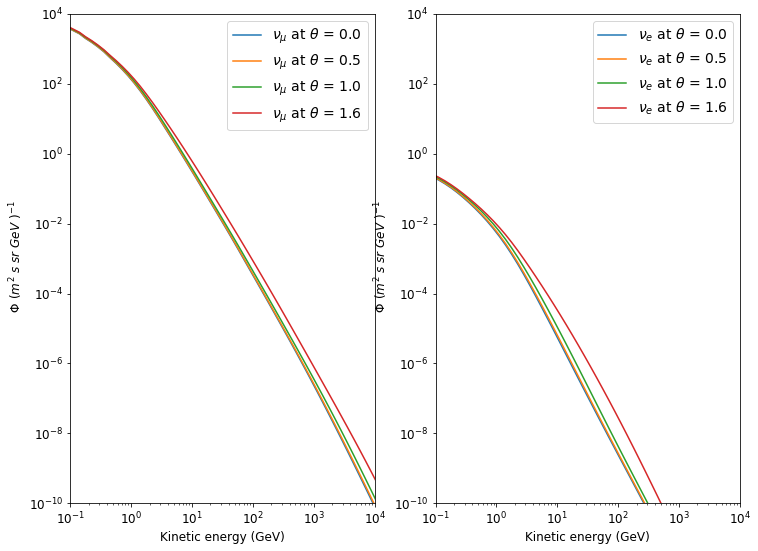

In [77]:
theta = np.linspace(0, np.pi/2, 4)

fig, axs = plt.subplots(1, 2, figsize=(12,9))
axs = axs.ravel()
r_nue = r'$\nu_e$'

for t in theta:
    muon_flux, numu_flux, nue_flux, x = flux(t)
    axs[0].loglog(x, numu_flux*10000, label=f'{r_numu} at {r_theta} = {np.round(t,1)}')  #m^2
    axs[1].loglog(x, nue_flux, label=f'{r_nue} at {r_theta} = {np.round(t,1)}')
    
for i in range(2):
    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    axs[i].set_ylabel(r' $\Phi$ ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].set_xlim(0.1, 10**4)
    axs[i].set_ylim(10**(-10), 10**4)
    axs[i].legend()

#fig.savefig('numu_nue_4angles.png')

In [6]:
n_theta = 50
cos_theta_matrix = np.linspace(0, 1, n_theta)
cos_theta_matrix[0] += 10**(-7)
theta_matrix = np.arccos(cos_theta_matrix)

flux_matrix = np.zeros((n_theta,121))

for t in range(len(theta_matrix)):
    print(t)
    numu_flux, x_matrix = flux(theta_matrix[t], numu_only = True)
    flux_matrix[t] = numu_flux

0
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
1
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
2
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
3
MCEqRun::set_interaction_model()

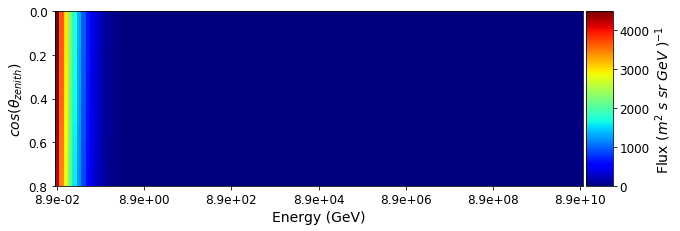

In [78]:
from matplotlib import cm, colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

flux_matrix *= 10000    # from cm^-2 to m^-2

# dividing by actual energy
#for i in range(len(flux_matrix_divided[0])):
    #flux_matrix_divided[:, i] /= x_matrix[i] 

energy_strings = [str("{:.1e}".format(x)) for x in x_matrix]
cos_theta_strings = [str(np.round(t, 1)) for t in cos_theta_matrix]
yticks = np.arange(0, 50, 10)
xticks = np.arange(0, 130, 20)
ylabels = [cos_theta_strings[i] for i in yticks]
xlabels = [energy_strings[i] for i in xticks]

fig, ax = plt.subplots(figsize=(10,7))

im = ax.imshow(flux_matrix, cmap='jet', norm = None)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
cbar.set_label(r'Flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$')
#fig.savefig('MCEq1d...');

In [79]:
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, 0)
    if np.all(mask):
        return None 
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()


In [80]:
# Plot in range 1-100 GeV

low_x = find_nearest_above(x_matrix, 1)
high_x =  find_nearest_above(x_matrix, 100)

flux_matrix_cropped = flux_matrix[:, low_x : high_x]
energy_cropped = x_matrix[low_x : high_x]
energy_strings_cropped = energy_strings[low_x : high_x]

In [81]:
xticks_cropped = np.arange(0, 21, 6)
xlabels_cropped = []   
for i in range(len(xticks_cropped)):
    label_x = energy_strings_cropped[xticks_cropped[i]]
    xlabels_cropped.append(label_x)

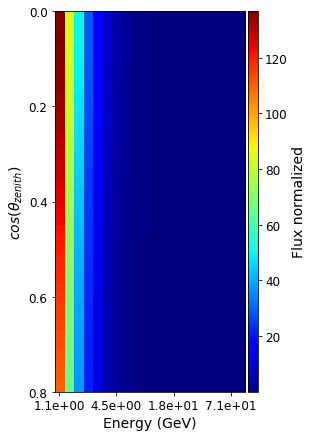

In [82]:
fig, ax = plt.subplots(figsize=(10,7))

im = ax.imshow(flux_matrix_cropped, cmap='jet')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks_cropped)
ax.set_xticklabels(xlabels_cropped)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
cbar.set_label('Flux normalized');

In [113]:
x_matrix

array([8.91250938e-02, 1.12201845e-01, 1.41253754e-01, 1.77827941e-01,
       2.23872114e-01, 2.81838293e-01, 3.54813389e-01, 4.46683592e-01,
       5.62341325e-01, 7.07945784e-01, 8.91250938e-01, 1.12201845e+00,
       1.41253754e+00, 1.77827941e+00, 2.23872114e+00, 2.81838293e+00,
       3.54813389e+00, 4.46683592e+00, 5.62341325e+00, 7.07945784e+00,
       8.91250938e+00, 1.12201845e+01, 1.41253754e+01, 1.77827941e+01,
       2.23872114e+01, 2.81838293e+01, 3.54813389e+01, 4.46683592e+01,
       5.62341325e+01, 7.07945784e+01, 8.91250938e+01, 1.12201845e+02,
       1.41253754e+02, 1.77827941e+02, 2.23872114e+02, 2.81838293e+02,
       3.54813389e+02, 4.46683592e+02, 5.62341325e+02, 7.07945784e+02,
       8.91250938e+02, 1.12201845e+03, 1.41253754e+03, 1.77827941e+03,
       2.23872114e+03, 2.81838293e+03, 3.54813389e+03, 4.46683592e+03,
       5.62341325e+03, 7.07945784e+03, 8.91250938e+03, 1.12201845e+04,
       1.41253754e+04, 1.77827941e+04, 2.23872114e+04, 2.81838293e+04,
      

In [112]:
energy_strings_cropped

['1.1e+00',
 '1.4e+00',
 '1.8e+00',
 '2.2e+00',
 '2.8e+00',
 '3.5e+00',
 '4.5e+00',
 '5.6e+00',
 '7.1e+00',
 '8.9e+00',
 '1.1e+01',
 '1.4e+01',
 '1.8e+01',
 '2.2e+01',
 '2.8e+01',
 '3.5e+01',
 '4.5e+01',
 '5.6e+01',
 '7.1e+01',
 '8.9e+01']

In [83]:
# Binning both axes

# cos intervals
cos_intervals = np.round(np.arange(0, 1, 0.1), 2)
cos_strings = []

cos_bins = np.digitize(cos_theta_matrix, cos_intervals) 

flux_matrix_cropped_ybinned = np.zeros((len(cos_intervals) , len(flux_matrix_cropped[0])))

# summing rows in same interval
for i in range(1, len(cos_intervals)+1):
    rows = np.where(cos_bins == i)[0]
    sum_row = np.sum(flux_matrix_cropped[rows[0] : rows[-1], : ], axis = 0) / len(rows)
    flux_matrix_cropped_ybinned[ i-1 , : ] = sum_row
                                        
# Making y-labels
for i in range(len(cos_intervals)-1):
    string = f'{cos_intervals[i]} - {cos_intervals[i+1]}'
    cos_strings.append(string)

    
# energy intervals
energy_min_cc = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,0]
energy_max_cc = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,1]
energy_bins_cc = np.digitize(energy_cropped, energy_min_cc)

energy_strings_binned = []

binned_cropped_matrix = np.zeros((len(cos_intervals), len(energy_min_cc)))

# summing columns in same interval
for i in range(1, len(energy_min_cc)+1):
    columns = np.where(energy_bins_cc == i)[0]
    sum_column = np.sum(flux_matrix_cropped_ybinned[ : , columns[0] : columns[-1]], axis = 1)/ len(columns)
    binned_cropped_matrix[ : , i-1 ] = sum_column
                                        
# Making x-labels
energy_min_string = np.append(energy_min_cc, 100)
for i in range(len(energy_min_cc)):
    string = f'{energy_min_string[i]} - {energy_min_string[i+1]}'
    energy_strings_binned.append(string)

In [103]:
energy_binwidths = energy_max_cc - energy_min_cc

binned_cropped_divided = binned_cropped_matrix.copy()


In [104]:
# dividing by energy range

#for i in range(len(binned_cropped_matrix)):
#    binned_cropped_divided[:, i] /= energy_binwidths[i]


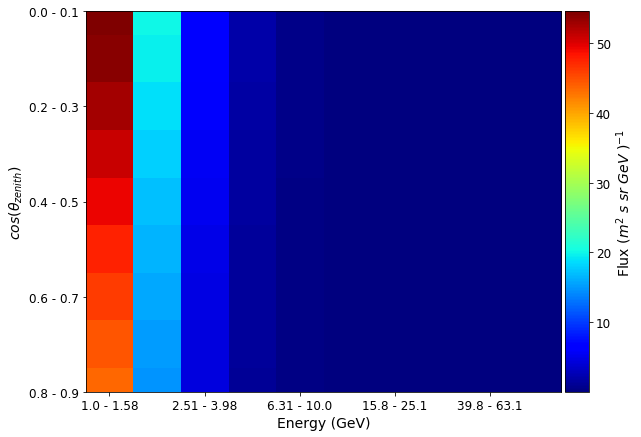

In [105]:
fig, ax = plt.subplots(figsize=(10,7))

im = ax.imshow(binned_cropped_divided, cmap='jet')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
xticks_binned = np.arange(0, 9, 2)
ax.set_xticks(xticks_binned)
xlabels_binned = [energy_strings_binned[i] for i in xticks_binned]
ax.set_xticklabels(xlabels_binned)
yticks_binned = np.arange(0, 9, 2)
ax.set_yticks(yticks_binned)
ylabels_binned = [cos_strings[i] for i in yticks_binned]
ax.set_yticklabels(ylabels_binned)
cbar.set_label('Flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$')
#fig.savefig('MCEq1d_cropped_binned_week4');

In [106]:
cos_values_total = np.round(np.arange(1, -1.1, -0.1), 2)
cos_strings_total = []

for i in range(len(cos_values_total)-1):
    string = f'{cos_values_total[i+1]} - {cos_values_total[i]}'
    cos_strings_total.append(string)
    

In [107]:
xticks = np.arange(-0.5, 10.5, 1)
energy_ticklabels = np.append(energy_min_cc, energy_max_cc[-1])
energy_strings = [f'{energy_ticklabels[i]}' for i in range(len(xticks))]

cos_values = np.round(np.arange(1, -1.1, -0.1), 2)
yticks = np.arange(-0.5, 20, 1)
ylabels = [f'{cos_values[i]}' for i in range(len(yticks))]

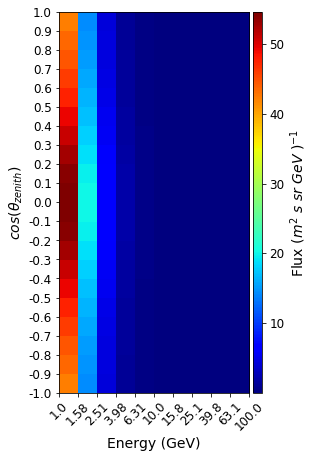

In [108]:
# Assuming symmetric for  negative values of cos

binned_cropped_matrix_total = np.concatenate((np.flip(binned_cropped_divided, axis=0), binned_cropped_divided))

fig, ax = plt.subplots(figsize=(10,7))

im = ax.imshow(binned_cropped_matrix_total, cmap='jet')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks)
ax.set_xticklabels(energy_strings, rotation = 45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
cbar.set_label('Flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$')
#fig.savefig('MCEq_1d_flux_mag0_divided')

In [109]:
# Create a 2D histogram of the total rate of neutrinos in one year from combining
# the flux histogram and the effective area values/histogram. 

A_eff_cc = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,2]
A_eff_nc = np.genfromtxt('numu_nc.csv', skip_header = 1, delimiter =',')[:,2]

# Multiplying effective area with flux
total_rate_cc = binned_cropped_matrix_total.copy()
total_rate_nc = binned_cropped_matrix_total.copy()

for i in range(len(A_eff_cc)):
    total_rate_cc[:, i] *= A_eff_cc[i]
    total_rate_nc[:, i] *= A_eff_nc[i]
    
total_rate_year_cc = total_rate_cc * 31_556_926    # seconds in a year
total_rate_year_nc = total_rate_nc * 31_556_926

In [115]:
np.savetxt('total_rate_year_cc' , total_rate_year_cc, delimiter =',')
np.savetxt('total_rate_year_nc' , total_rate_year_nc, delimiter =',')

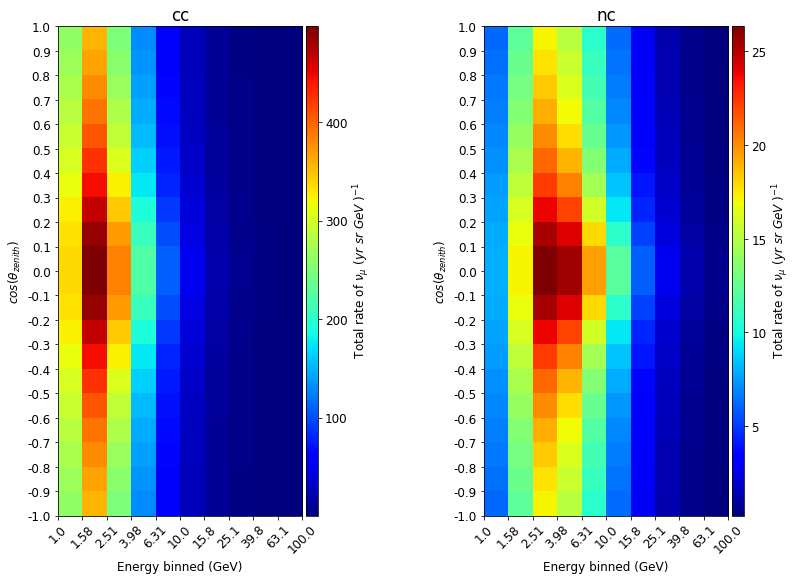

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(14, 9))
ax.ravel()

im_0 = ax[0].imshow(total_rate_year_cc, cmap='jet') 
im_1 = ax[1].imshow(total_rate_year_nc, cmap='jet') 

for i in range(2):
    ax[i].set_xlabel('Energy binned (GeV)', fontsize = 12)
    ax[i].set_ylabel(r'$cos(\theta_{zenith})$', fontsize = 12)
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(energy_strings, rotation = 45)
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(ylabels)
    
divider_0 = make_axes_locatable(ax[0])
divider_1 = make_axes_locatable(ax[1])
cax_0 = divider_0.append_axes("right", size="5%", pad=0.05)
cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
cbar_0 = plt.colorbar(im_0, cax=cax_0)
cbar_1 = plt.colorbar(im_1, cax=cax_1)
cbar_0.set_label(r' Total rate of $\nu_{\mu}$ ($yr$ $sr$ $GeV$ $)^{-1}$', fontsize = 12) 
cbar_1.set_label(r' Total rate of $\nu_{\mu}$ ($yr$ $sr$ $GeV$ $)^{-1}$', fontsize = 12) 

ax[0].set_title('cc')
ax[1].set_title('nc');
#fig.savefig('MCEq_1d_rate_in_year_mag0_divided');

In [ ]:
# The energy ticklabels are not exactly true, because these exact values don't exist in the energy array but only values close to these